# <h1>🧵 Java Multithreading in Inventory Sales System using JDBC and MySQL</h1>

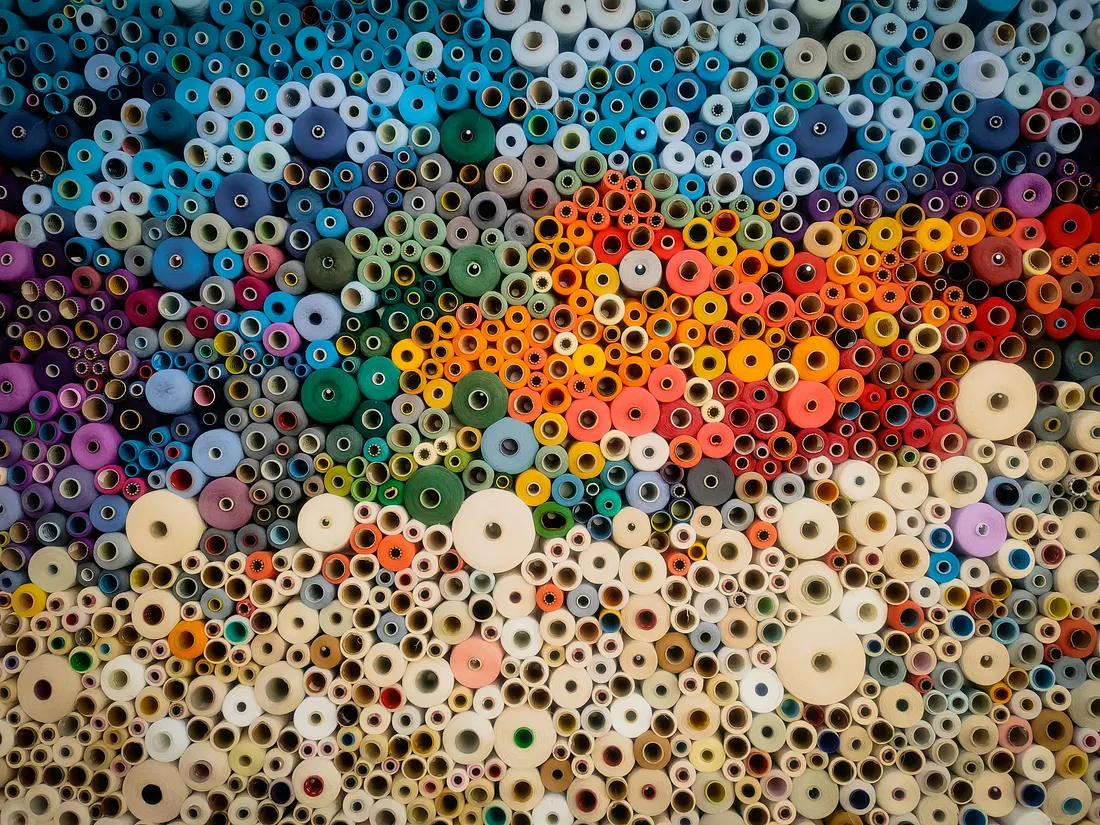



<h2>📌 Overview</h2>
<p>This project explores how multithreading and connection pooling can drastically improve the performance of large-scale data analytics in Java using JDBC and MySQL. We simulate this by importing and querying over <strong>1 million records</strong> from a CSV file (<code>SalesFINAL12312016.csv</code>) into MySQL.</p>

<h2>🧠 What is Multithreading?</h2>
<p><strong>Multithreading</strong> is a feature in Java that allows concurrent execution of two or more parts
of a program for maximum utilization of CPU. Each part of such a program is called a thread, and each thread defines
a separate path of execution.</p>
<p>It's the ability of a program to perform multiple tasks concurrently using multiple "threads" of execution. 
Example: Imagine a restaurant kitchen where multiple chefs are working simultaneously on different dishes. 
    This setup ensures faster service and better CPU (chef) utilization, just like threads in Java.
<p>🎯Real-World Example: A file uploader app can use separate threads for uploading the file, showing a progress bar, responding to user actions, and logging.</p>

<p><b>What is a Thread?</b> It's the smallest unit of execution within a process. An application can have many threads, each running its own instructions. The "main thread" is present in every app by default.</p>    
<h3>🎯 Why use it?</h3>
<ul>
  <li>Increases application performance on multi-core processors.</li>
  <li>Reduces total processing time.</li>
  <li>Makes applications more responsive (especially I/O bound tasks like JDBC calls).</li>
</ul>



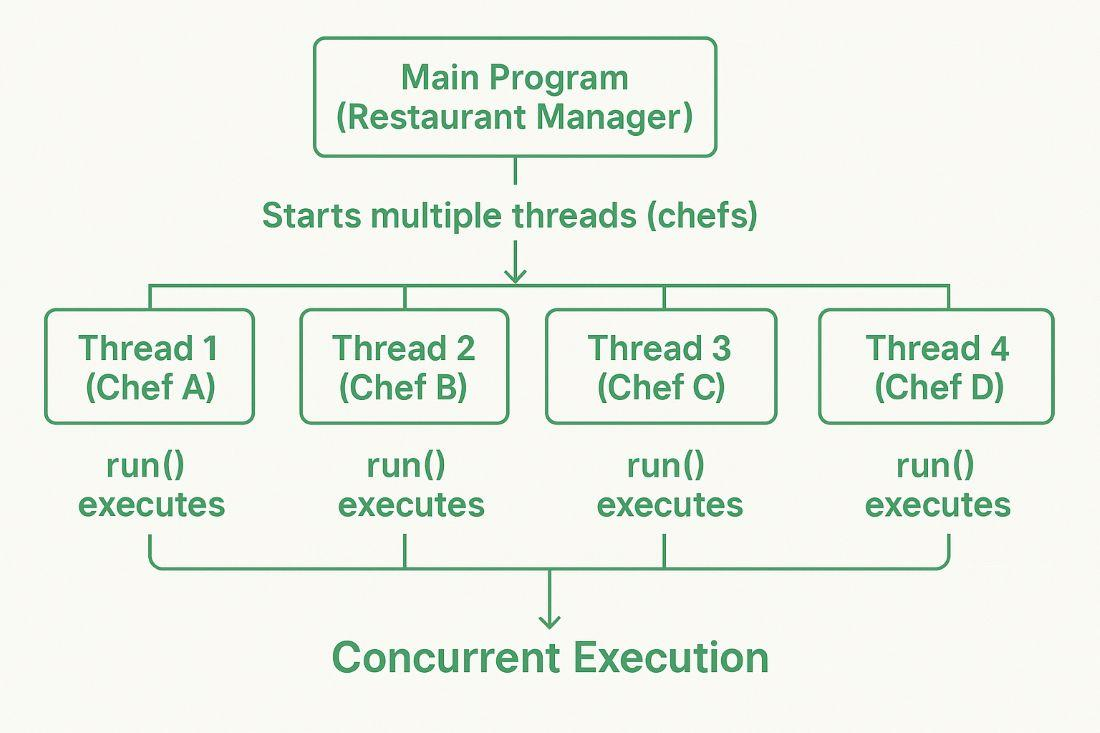

In [ ]:
class CookingTask extends Thread {
    private String task;

    CookingTask(String task) {
        this.task = task;
    }

    public void run() {
        System.out.println(task + " is being prepared by " +
            Thread.currentThread().getName());
    }
}

public class Restaurant {
    public static void main(String[] args) {
        Thread t1 = new CookingTask("Pasta");
        Thread t2 = new CookingTask("Salad");
        Thread t3 = new CookingTask("Dessert");
        Thread t4 = new CookingTask("Rice");

        t1.start();
        t2.start();
        t3.start();
        t4.start();
    }
}

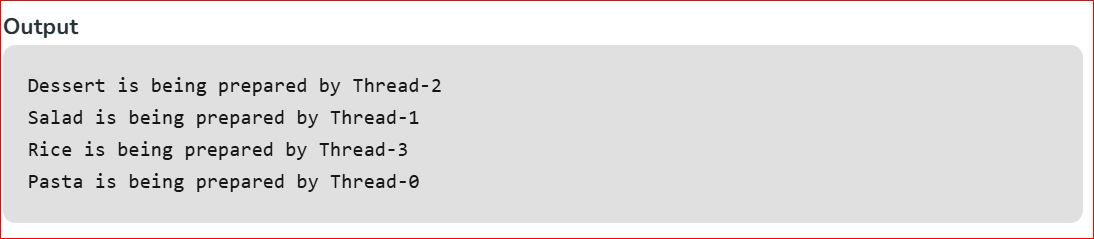

## Explanation:
<ul>
<li>The program creates multiple threads by extending the Thread class (CookingTask).
<li>Each thread represents a dish being prepared (e.g., Pasta, Salad, etc.).
<li>Threads t1 to t4 are started using .start(), allowing tasks to run concurrently.
</ul>

<h2>🚚 Real-World Example: Online Food Delivery System</h2>

<h3>🎯 Scenario:</h3>
<p>You are using an online food delivery app like Zomato or Swiggy. When you place an order, the system has to perform several tasks <strong>simultaneously</strong>:</p>

<h3>🧵 Multithreaded Breakdown:</h3>
<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Task</th>
      <th>Handled by a Separate Thread</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>🍽️ Fetch menu items from restaurants</td><td>✔️ Thread 1</td></tr>
    <tr><td>🧍‍♂️ Validate user login session</td><td>✔️ Thread 2</td></tr>
    <tr><td>💳 Process payment via payment API</td><td>✔️ Thread 3</td></tr>
    <tr><td>🛵 Track delivery boy in real-time</td><td>✔️ Thread 4</td></tr>
    <tr><td>📬 Send order confirmation email/SMS</td><td>✔️ Thread 5</td></tr>
    <tr><td>📈 Log transaction in database</td><td>✔️ Thread 6</td></tr>
  </tbody>
</table>

<h3>✅ Without Multithreading:</h3>
<p>Each task would be done <strong>one after another</strong>. So if payment processing or database logging is slow, the user has to <strong>wait longer</strong>.</p>

<h3>✅ With Multithreading:</h3>
<p>All tasks happen <strong>in parallel</strong>, giving the user a <strong>fast and seamless</strong> experience.</p>

<h3>🔄 Technical View (Java Example):</h3>
<pre><code>
// Threads created to handle individual tasks
Thread fetchMenu = new Thread(() -> fetchMenuItems());
Thread processPayment = new Thread(() -> processPayment());
Thread sendConfirmation = new Thread(() -> sendEmail());
Thread trackDelivery = new Thread(() -> trackLocation());

fetchMenu.start();
processPayment.start();
sendConfirmation.start();
trackDelivery.start();
</code></pre>

<h3>📌 Benefits:</h3>
<ul>
  <li>Faster user experience ⏱️</li>
  <li>Better resource utilization (CPU cores) ⚙️</li>
  <li>Real-time responsiveness 📡</li>
  <li>Scalable for high traffic 🌐</li>
</ul>


## Multithreading in Inventory Sales System using JDBC and MySQL

<h2>🛠️ Tools Used</h2>
<ul>
  <li>Java 17+</li>
  <li>JDBC + MySQL</li>
  <li>HikariCP (for connection pooling)</li>
  <li>MySQL Connector/J (<code>mysql-connector-j-9.3.0</code>)</li>
  <li>Dataset: ~1,048,575 rows</li>
</ul>
<table border="1" cellspacing="0" cellpadding="6">
  <tr>
    <th>JAR File</th>
    <th>Purpose</th>
  </tr>
  <tr>
    <td>HikariCP-7.0.0.jar</td>
    <td>Connection Pooling (Fast DB access)</td>
  </tr>
  <tr>
    <td>mysql-connector-j-9.3.0.jar</td>
    <td>MySQL JDBC Driver</td>
  </tr>
  <tr>
    <td>slf4j-api-2.0.13.jar</td>
    <td>Logging API Interface</td>
  </tr>
  <tr>
    <td>slf4j-simple-2.0.13.jar</td>
    <td>Simple Logger Implementation</td>
  </tr>
</table>

<h2>📂 Java Components</h2>

<h3>✅ Data Source Table Structure</h3>
<pre><code>CREATE TABLE inventory_sales (
    InventoryId INT,
    Store VARCHAR(100),
    Brand VARCHAR(100),
    Description TEXT,
    Size VARCHAR(50),
    SalesQuantity INT,
    SalesDollars DOUBLE,
    SalesPrice DOUBLE,
    SalesDate DATE,
    Volume DOUBLE,
    Classification VARCHAR(100),
    ExciseTax DOUBLE,
    VendorNo VARCHAR(100),
    VendorName VARCHAR(255)
);
CREATE INDEX idx_salesdate ON inventory_sales(SalesDate);
CREATE INDEX idx_vendor ON inventory_sales(VendorNo);
SELECT * FROM inventory_sales LIMIT 1;
ALTER TABLE inventory_sales ADD INDEX idx_brand (Brand);
ALTER TABLE inventory_sales ADD INDEX idx_store (Store);
ALTER TABLE inventory_sales ADD INDEX idx_vendor (VendorName);
</code></pre>

<h2>⚙️ Query Tasks</h2>
<pre><code>static final String[] QUERIES = {
    "SELECT COUNT(*) FROM inventory_sales",
    "SELECT SUM(SalesDollars) FROM inventory_sales",
    "SELECT Store, SUM(SalesDollars) FROM inventory_sales GROUP BY Store ORDER BY 2 DESC LIMIT 5",
    "SELECT Brand, SUM(SalesDollars) FROM inventory_sales GROUP BY Brand ORDER BY 2 DESC LIMIT 5",
    "SELECT VendorName, SUM(SalesDollars) FROM inventory_sales GROUP BY VendorName ORDER BY 2 DESC LIMIT 5",
    "SELECT Category, COUNT(*) FROM inventory_sales GROUP BY Category",
    "SELECT MAX(SalesQuantity), MIN(SalesQuantity) FROM inventory_sales",
    "SELECT ProductName FROM inventory_sales WHERE SalesQuantity > 1000",
    "SELECT AVG(SalesDollars) FROM inventory_sales",
    "SELECT DISTINCT(Store) FROM inventory_sales"
}
</code></pre>

<h2>🚀 Performance Comparison</h2>

<h3>🔹 1. Single-threaded (Sequential)</h3>
<ul><li>All queries run one after the other.</li><li><strong>Time Taken</strong>: <code>~49,121 ms</code></li></ul>

<h3>🔹 2. Multi-threaded (No Connection Pooling)</h3>
<ul><li>Each query runs in its own thread.</li><li><strong>Time Taken</strong>: <code>~23,030 ms</code></li></ul>

<h3>🔹 3. Multi-threaded with HikariCP Connection Pool</h3>
<ul><li>Threads are launched concurrently using shared DB connections.</li><li><strong>Time Taken</strong>: <code>~23,186 ms</code></li></ul>

<h3>📊 Summary</h3>
<table border="1" cellpadding="5">
  <tr>
    <th>Approach</th>
    <th>Threads</th>
    <th>Time (ms)</th>
  </tr>
  <tr>
    <td>Single-threaded</td>
    <td>1</td>
    <td>49,121</td>
  </tr>
  <tr>
    <td>Multi-threaded (No Pooling)</td>
    <td>4</td>
    <td>23,030</td>
  </tr>
  <tr>
    <td>Multi-threaded (With Pool)</td>
    <td>4</td>
    <td>23,186</td>
  </tr>
</table>
<p>✅ <em>Threading reduces query time by over 50%.</em></p>

<h2>🔧 Connection Pool (HikariCP)</h2>
<p>HikariCP is a high-performance JDBC connection pool. We added it in the <code>DBConnectionPool.java</code>:</p>
<pre><code>public class DBConnectionPool {
    private static final HikariDataSource dataSource;

    static {
        HikariConfig config = new HikariConfig();
        config.setJdbcUrl("jdbc:mysql://localhost:3306/billing_system");
        config.setUsername("root");
        config.setPassword("password");
        config.setMaximumPoolSize(10);
        config.setMinimumIdle(2);
        dataSource = new HikariDataSource(config);
    }

    public static HikariDataSource getDataSource() {
        return dataSource;
    }
}
</code></pre>

<h2>🧪 Benchmark Class Highlights</h2>
<pre><code>public class BillingSystemBenchmark {
    static final String[] QUERIES = { /* as above */ };

    public static void main(String[] args) throws Exception {
        runSingleThreaded();
        runMultiThreaded();
        runWithConnectionPooling();
    }
}
</code></pre>

<h3>Sample Output:</h3>
<pre><code>
▶ Single-threaded Time: 49121 ms
▶ Multi-threaded (No Pooling) Time: 23030 ms
▶ Multi-threaded (With Pooling) Time: 23186 ms
</code></pre>

<h2>📦 Files</h2>
<table border="1" cellpadding="5">
  <tr><th>File</th><th>Purpose</th></tr>
  <tr><td>BillingSystemBenchmark.java</td><td>Main test class with benchmarking logic</td></tr>
  <tr><td>DBConnectionPool.java</td><td>HikariCP connection pool setup</td></tr>
  <tr><td>SalesFINAL12312016.csv</td><td>1M+ records source file</td></tr>
</table>




<h2>🧪 Setup: Billing System Data</h2>
<ul>
  <li><strong>Database:</strong> MySQL</li>
  <li><strong>Table:</strong> <code>inventory_sales</code></li>
  <li><strong>Rows:</strong> 1,000,000+</li>
</ul>

<h3>📄 Queries Executed:</h3>
<pre><code class="language-java">
static final String[] QUERIES = {
    "SELECT COUNT(*) FROM inventory_sales",
    "SELECT SUM(SalesDollars) FROM inventory_sales",
    "SELECT Store, SUM(SalesDollars) FROM inventory_sales GROUP BY Store ORDER BY 2 DESC LIMIT 5",
    "SELECT Brand, SUM(SalesDollars) FROM inventory_sales GROUP BY Brand ORDER BY 2 DESC LIMIT 5",
    "SELECT VendorName, SUM(SalesDollars) FROM inventory_sales GROUP BY VendorName ORDER BY 2 DESC LIMIT 5",
    "SELECT Category, COUNT(*) FROM inventory_sales GROUP BY Category",
    "SELECT MAX(SalesQuantity), MIN(SalesQuantity) FROM inventory_sales",
    "SELECT ProductName FROM inventory_sales WHERE SalesQuantity > 1000",
    "SELECT AVG(SalesDollars) FROM inventory_sales",
    "SELECT DISTINCT(Store) FROM inventory_sales"
};
</code></pre>

<h2>⚙️ 1. Single-threaded Execution</h2>
<p><strong>How it works:</strong> All queries are run sequentially using a single database connection.</p>
<pre><code class="language-java">
for (String query : QUERIES) {
    runQuery(query); // Each waits for the previous one
}
</code></pre>
<ul>
  <li>⛔ <strong>Drawback:</strong> Under-utilizes CPU</li>
  <li>Slow DB response = longer total time</li>
</ul>

<h2>⚙️ 2. Multithreaded (No Connection Pool)</h2>
<p><strong>How it works:</strong> Each query runs in its own thread with a new database connection.</p>
<pre><code class="language-java">
for (String query : QUERIES) {
    new Thread(() -> runQuery(query)).start();  // Each creates new connection
}
</code></pre>
<ul>
  <li>✅ <strong>Benefit:</strong> Faster than single-threaded</li>
  <li>❌ <strong>Drawback:</strong> Overhead of opening/closing DB connections</li>
  <li>Risk of connection exhaustion</li>
</ul>

<h2>⚙️ 3. Multithreaded with HikariCP (Connection Pool)</h2>
<p><strong>How it works:</strong> Each thread reuses a database connection from the HikariCP pool.</p>
<pre><code class="language-java">
ExecutorService executor = Executors.newFixedThreadPool(THREAD_COUNT);
for (String query : QUERIES) {
    executor.submit(() -> runQueryUsingPool(query));
}
</code></pre>
<ul>
  <li>✅ <strong>Benefits:</strong> Fastest method</li>
  <li>Efficient memory and resource use</li>
  <li>No connection creation overhead</li>
</ul>

<h2>🔁 Connection Pooling vs No Pooling</h2>
<table border="1" cellspacing="0" cellpadding="5">
  <thead>
    <tr>
      <th>Feature</th>
      <th>No Pooling</th>
      <th>With Pooling (HikariCP)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>DB connection per thread</td>
      <td>New connection every time</td>
      <td>Reused from pool</td>
    </tr>
    <tr>
      <td>Performance</td>
      <td>Medium</td>
      <td>High</td>
    </tr>
    <tr>
      <td>Resource usage</td>
      <td>High</td>
      <td>Optimized</td>
    </tr>
    <tr>
      <td>Memory overhead</td>
      <td>More</td>
      <td>Less</td>
    </tr>
  </tbody>
</table>





<h2>✅ Conclusion</h2>
<p>Multithreading and connection pooling significantly improve the performance of large data processing systems. This experiment illustrates how:</p>
<ul>
  <li><strong>Single-threading is slow</strong></li>
  <li><strong>Multithreading accelerates data analysis</strong></li>
  <li><strong>Connection pooling optimizes DB usage</strong></li>
</ul>

<h2>📎 How to Run</h2>
<pre><code>
# Compile
javac -cp ".;lib/*" BillingSystemBenchmark.java DBConnectionPool.java

# Run
java -cp ".;lib/*" BillingSystemBenchmark
</code></pre>
<p>💡 Ensure you have placed <code>mysql-connector-j-9.3.0.jar</code>, HikariCP JAR, and slf4j libraries inside <code>lib/</code> folder.</p>


# Code for BillingSystemBenchmark.java

In [ ]:
import java.sql.*;
import java.util.concurrent.*;
import javax.sql.DataSource;

public class BillingSystemBenchmark {

    static final String[] QUERIES = {
        "SELECT SUM(SalesDollars) AS TotalSales FROM inventory_sales",
        "SELECT Brand, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY Brand ORDER BY Total DESC LIMIT 5",
        "SELECT Store, SUM(SalesQuantity) AS Quantity FROM inventory_sales GROUP BY Store ORDER BY Quantity DESC LIMIT 5",
        "SELECT VendorName, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY VendorName ORDER BY Total DESC LIMIT 5",
        "SELECT COUNT(*) FROM inventory_sales",
        "SELECT MAX(SalesPrice) FROM inventory_sales",
        "SELECT MIN(SalesPrice) FROM inventory_sales",
        "SELECT AVG(SalesQuantity) FROM inventory_sales",
        "SELECT Classification, COUNT(*) FROM inventory_sales GROUP BY Classification",
        "SELECT SalesDate, SUM(SalesDollars) FROM inventory_sales GROUP BY SalesDate ORDER BY SalesDate DESC LIMIT 5"
    };

    static final int THREAD_COUNT = 4; // You can change this

    public static void main(String[] args) throws Exception {
        long t1 = System.currentTimeMillis();
        runSingleThreaded();
        long t2 = System.currentTimeMillis();
        System.out.println("\nSingle-threaded Time: " + (t2 - t1) + " ms");

        long t3 = System.currentTimeMillis();
        runMultiThreadedNoPooling();
        long t4 = System.currentTimeMillis();
        System.out.println("\nMulti-threaded (No Pooling) Time: " + (t4 - t3) + " ms");

        long t5 = System.currentTimeMillis();
        runMultiThreadedWithPooling();
        long t6 = System.currentTimeMillis();
        System.out.println("\nMulti-threaded (With Pooling) Time: " + (t6 - t5) + " ms");
    }

    static void runSingleThreaded() {
        for (String query : QUERIES) {
            try (Connection conn = DriverManager.getConnection("jdbc:mysql://localhost:3306/billing_system", "root", "root");
                 Statement stmt = conn.createStatement();
                 ResultSet rs = stmt.executeQuery(query)) {
                System.out.println("Running Query (Single-threaded): " + query);
                printResult(rs);
            } catch (SQLException e) {
                e.printStackTrace();
            }
        }
    }

    static void runMultiThreadedNoPooling() throws InterruptedException {
        ExecutorService executor = Executors.newFixedThreadPool(THREAD_COUNT);
        for (String query : QUERIES) {
            executor.submit(() -> {
                try (Connection conn = DriverManager.getConnection("jdbc:mysql://localhost:3306/billing_system", "root", "root");
                     Statement stmt = conn.createStatement();
                     ResultSet rs = stmt.executeQuery(query)) {
                    System.out.println("Running Query (No Pooling): " + query);
                    printResult(rs);
                } catch (SQLException e) {
                    e.printStackTrace();
                }
            });
        }
        executor.shutdown();
        executor.awaitTermination(2, TimeUnit.MINUTES);
    }

    static void runMultiThreadedWithPooling() throws InterruptedException {
        ExecutorService executor = Executors.newFixedThreadPool(THREAD_COUNT);
        DataSource ds = DBConnectionPool.getDataSource();

        for (String query : QUERIES) {
            executor.submit(() -> {
                try (Connection conn = ds.getConnection();
                     Statement stmt = conn.createStatement();
                     ResultSet rs = stmt.executeQuery(query)) {
                    System.out.println("Running Query (With Pooling): " + query);
                    printResult(rs);
                } catch (SQLException e) {
                    e.printStackTrace();
                }
            });
        }

        executor.shutdown();
        executor.awaitTermination(2, TimeUnit.MINUTES);
    }

    static void printResult(ResultSet rs) throws SQLException {
        ResultSetMetaData meta = rs.getMetaData();
        int columnCount = meta.getColumnCount();
        while (rs.next()) {
            for (int i = 1; i <= columnCount; i++) {
                System.out.print(meta.getColumnLabel(i) + ": " + rs.getString(i) + " | ");
            }
            System.out.println();
        }
    }
}


# Code for DBConnectionPool.java 

In [ ]:
import com.zaxxer.hikari.HikariConfig;
import com.zaxxer.hikari.HikariDataSource;

import javax.sql.DataSource;

public class DBConnectionPool {
    private static final HikariDataSource ds;

    static {
        HikariConfig config = new HikariConfig();
        config.setJdbcUrl("jdbc:mysql://localhost:3306/billing_system");
        config.setUsername("root");
        config.setPassword("root");
        config.setMaximumPoolSize(4); // match thread count
        config.setMinimumIdle(2);
        config.setIdleTimeout(30000);
        config.setMaxLifetime(60000);
        ds = new HikariDataSource(config);
    }

    public static DataSource getDataSource() {
        return ds;
    }
}


# Output

In [ ]:
PS I:\billing_system> java -cp ".;lib/*" BillingSystemBenchmark
Running Query (Single-threaded): SELECT SUM(SalesDollars) AS TotalSales FROM inventory_sales
TotalSales: 33139375.29 | 
Running Query (Single-threaded): SELECT Brand, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY Brand ORDER BY Total DESC LIMIT 5
Brand: 4261 | Total: 444810.74 | 
Brand: 3545 | Total: 357759.17 | 
Brand: 1233 | Total: 344712.22 | 
Brand: 8068 | Total: 288135.11 | 
Brand: 3405 | Total: 275162.97 | 
Running Query (Single-threaded): SELECT Store, SUM(SalesQuantity) AS Quantity FROM inventory_sales GROUP BY Store ORDER BY Quantity DESC LIMIT 5
Store: 15 | Quantity: 101078 | 
Store: 34 | Quantity: 99171 |
Store: 10 | Quantity: 91576 |
Store: 76 | Quantity: 85724 |
Store: 38 | Quantity: 84965 |
Running Query (Single-threaded): SELECT VendorName, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY VendorName ORDER BY Total DESC LIMIT 5
VendorName: DIAGEO NORTH AMERICA INC    | Total: 4832706.85 | 
VendorName: MARTIGNETTI COMPANIES | Total: 3107790.36 |
VendorName: JIM BEAM BRANDS COMPANY     | Total: 2522931.01 |
VendorName: PERNOD RICARD USA           | Total: 2216331.21 |
VendorName: CONSTELLATION BRANDS INC    | Total: 1879079.02 |
Running Query (Single-threaded): SELECT COUNT(*) FROM inventory_sales
COUNT(*): 1048575 | 
Running Query (Single-threaded): SELECT MAX(SalesPrice) FROM inventory_sales
MAX(SalesPrice): 4999.99 | 
Running Query (Single-threaded): SELECT MIN(SalesPrice) FROM inventory_sales
MIN(SalesPrice): 0.49 | 
Running Query (Single-threaded): SELECT AVG(SalesQuantity) FROM inventory_sales
AVG(SalesQuantity): 2.3376 | 
Running Query (Single-threaded): SELECT Classification, COUNT(*) FROM inventory_sales GROUP BY Classification
Classification: 1 | COUNT(*): 611791 | 
Classification: 2 | COUNT(*): 436784 |
Running Query (Single-threaded): SELECT SalesDate, SUM(SalesDollars) FROM inventory_sales GROUP BY SalesDate ORDER BY SalesDate DESC LIMIT 5
SalesDate: null | SUM(SalesDollars): 33139375.29 | 
==============================================================================================================================
Single-threaded Time: 43224 ms
==============================================================================================================================
Running Query (No Pooling): SELECT SUM(SalesDollars) AS TotalSales FROM inventory_sales
TotalSales: 33139375.29 | 
Running Query (No Pooling): SELECT COUNT(*) FROM inventory_sales
COUNT(*): 1048575 | 
Running Query (No Pooling): SELECT MAX(SalesPrice) FROM inventory_sales
MAX(SalesPrice): 4999.99 | 
Running Query (No Pooling): SELECT MIN(SalesPrice) FROM inventory_sales
MIN(SalesPrice): 0.49 | 
Running Query (No Pooling): SELECT Store, SUM(SalesQuantity) AS Quantity FROM inventory_sales GROUP BY Store ORDER BY Quantity DESC LIMIT 5
Store: 15 | Quantity: 101078 | 
Store: 34 | Quantity: 99171 |
Store: 10 | Quantity: 91576 |
Store: 76 | Quantity: 85724 |
Store: 38 | Quantity: 84965 |
Running Query (No Pooling): SELECT Brand, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY Brand ORDER BY Total DESC LIMIT 5
Brand: 4261 | Total: 444810.74 | 
Brand: 3545 | Total: 357759.17 |
Brand: 1233 | Total: 344712.22 |
Brand: 8068 | Total: 288135.11 |
Brand: 3405 | Total: 275162.97 |
Running Query (No Pooling): SELECT AVG(SalesQuantity) FROM inventory_sales
AVG(SalesQuantity): 2.3376 | 
Running Query (No Pooling): SELECT Classification, COUNT(*) FROM inventory_sales GROUP BY Classification
Classification: 1 | COUNT(*): 611791 | 
Classification: 2 | COUNT(*): 436784 |
Running Query (No Pooling): SELECT VendorName, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY VendorName ORDER BY Total DESC LIMIT 5
VendorName: DIAGEO NORTH AMERICA INC    | Total: 4832706.85 | 
VendorName: MARTIGNETTI COMPANIES | Total: 3107790.36 |
VendorName: JIM BEAM BRANDS COMPANY     | Total: 2522931.01 |
VendorName: PERNOD RICARD USA           | Total: 2216331.21 |
VendorName: CONSTELLATION BRANDS INC    | Total: 1879079.02 |
Running Query (No Pooling): SELECT SalesDate, SUM(SalesDollars) FROM inventory_sales GROUP BY SalesDate ORDER BY SalesDate DESC LIMIT 5
SalesDate: null | SUM(SalesDollars): 33139375.29 | 
==================================================================================================================================
Multi-threaded (No Pooling) Time: 20451 ms
==================================================================================================================================   
[main] WARN com.zaxxer.hikari.HikariConfig - HikariPool-1 - keepaliveTime is greater than or equal to maxLifetime, disabling it.
[main] INFO com.zaxxer.hikari.HikariDataSource - HikariPool-1 - Starting...
[main] INFO com.zaxxer.hikari.pool.HikariPool - HikariPool-1 - Added connection com.mysql.cj.jdbc.ConnectionImpl@f0da945
[main] INFO com.zaxxer.hikari.HikariDataSource - HikariPool-1 - Start completed.
Running Query (With Pooling): SELECT SUM(SalesDollars) AS TotalSales FROM inventory_sales
TotalSales: 33139375.29 | 
Running Query (With Pooling): SELECT COUNT(*) FROM inventory_sales
COUNT(*): 1048575 | 
Running Query (With Pooling): SELECT MAX(SalesPrice) FROM inventory_sales
MAX(SalesPrice): 4999.99 | 
Running Query (With Pooling): SELECT Store, SUM(SalesQuantity) AS Quantity FROM inventory_sales GROUP BY Store ORDER BY Quantity DESC LIMIT 5
Store: 15 | Quantity: 101078 | 
Store: 34 | Quantity: 99171 |
Store: 10 | Quantity: 91576 |
Store: 76 | Quantity: 85724 |
Store: 38 | Quantity: 84965 |
Running Query (With Pooling): SELECT MIN(SalesPrice) FROM inventory_sales
MIN(SalesPrice): 0.49 | 
Running Query (With Pooling): SELECT Brand, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY Brand ORDER BY Total DESC LIMIT 5
Brand: 4261 | Total: 444810.74 | 
Brand: 3545 | Total: 357759.17 |
Brand: 1233 | Total: 344712.22 |
Brand: 8068 | Total: 288135.11 |
Brand: 3405 | Total: 275162.97 |
Running Query (With Pooling): SELECT AVG(SalesQuantity) FROM inventory_sales
AVG(SalesQuantity): 2.3376 | 
Running Query (With Pooling): SELECT Classification, COUNT(*) FROM inventory_sales GROUP BY Classification
Classification: 1 | COUNT(*): 611791 | 
Classification: 2 | COUNT(*): 436784 |
Running Query (With Pooling): SELECT VendorName, SUM(SalesDollars) AS Total FROM inventory_sales GROUP BY VendorName ORDER BY Total DESC LIMIT 5
VendorName: DIAGEO NORTH AMERICA INC    | Total: 4832706.85 | 
VendorName: MARTIGNETTI COMPANIES | Total: 3107790.36 |
VendorName: JIM BEAM BRANDS COMPANY     | Total: 2522931.01 |
VendorName: PERNOD RICARD USA           | Total: 2216331.21 |
VendorName: CONSTELLATION BRANDS INC    | Total: 1879079.02 |
Running Query (With Pooling): SELECT SalesDate, SUM(SalesDollars) FROM inventory_sales GROUP BY SalesDate ORDER BY SalesDate DESC LIMIT 5
SalesDate: null | SUM(SalesDollars): 33139375.29 | 
==============================================================================================================================
Multi-threaded (With Pooling) Time: 20097 ms
===============================================================================================================================    